## Find the best movies of 2024 by analyzing ratings and genres.

### Extracted data from Web Scraping

In [1]:
# Import Libraries
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd

In [2]:
## Request the page source from url
url= "https://www.imdb.com/list/ls524684600/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0 Safari/537.36"
}

In [3]:
response= requests.get(url, headers=headers)
response

<Response [200]>

In [4]:
response.content

b'<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === \'function\'){ uet(\'bb\', \'LoadTitle\', {wb: 1}); }</script><script>window.addEventListener(\'load\', (event) => {\n        if (typeof window.csa !== \'undefined\' && typeof window.csa === \'function\') {\n            var csaLatencyPlugin = window.csa(\'Content\', {\n                element: {\n                    slotId: \'LoadTitle\',\n                    type: \'service-call\'\n                }\n            });\n            csaLatencyPlugin(\'mark\', \'clickToBodyBegin\', 1733082425216);\n        }\n    })</script><title>Best Indian Movies - 2024</title><meta name="description" content="" data-id="main"/><script type="application/ld+json">{"@type":"ItemList","itemListElement":[{"@type":"ListItem","item":{"@type":"Movie","url":"https://www.imdb.com/

In [5]:
soup= BeautifulSoup(response.content, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width" name="viewport"/>
  <script>
   if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }
  </script>
  <script>
   window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1733082425216);
        }
    })
  </script>
  <title>
   Best Indian Movies - 2024
  </title>
  <meta content="" data-id="main" name="description"/>
  <script type="application/ld+json">
   {"@type":"ItemList","itemListElement":[{"@type":"ListItem","item":{"@type":"Movie","url":"https:

In [6]:
 script_tag = soup.find("script", type="application/ld+json")
 script_tag

<script type="application/ld+json">{"@type":"ItemList","itemListElement":[{"@type":"ListItem","item":{"@type":"Movie","url":"https://www.imdb.com/title/tt26548265/","name":"Maharaja","description":"A barber seeks vengeance after his home is burglarized, cryptically telling police his &quot;lakshmi&quot; has been taken, leaving them uncertain if it&apos;s a person or object. His quest to recover the elusive &quot;lakshmi&quot; unfolds.","image":"https://m.media-amazon.com/images/M/MV5BNWMwMzQwOWEtNTgyYy00MzM1LTg3ODktZDM5YWI5NjhiOTc3XkEyXkFqcGc@._V1_.jpg","aggregateRating":{"@type":"AggregateRating","bestRating":10,"worstRating":1,"ratingValue":8.5,"ratingCount":54632},"genre":"Action, Crime, Drama","duration":"PT2H21M"}},{"@type":"ListItem","item":{"@type":"Movie","url":"https://www.imdb.com/title/tt26458038/","name":"Manjummel Boys","description":"A group of friends get into a daring rescue mission to save their friend from Guna Caves, a perilously deep pit from where nobody has ever b

In [7]:
json_data = json.loads(script_tag.string)
json_data

{'@type': 'ItemList',
 'itemListElement': [{'@type': 'ListItem',
   'item': {'@type': 'Movie',
    'url': 'https://www.imdb.com/title/tt26548265/',
    'name': 'Maharaja',
    'description': 'A barber seeks vengeance after his home is burglarized, cryptically telling police his &quot;lakshmi&quot; has been taken, leaving them uncertain if it&apos;s a person or object. His quest to recover the elusive &quot;lakshmi&quot; unfolds.',
    'image': 'https://m.media-amazon.com/images/M/MV5BNWMwMzQwOWEtNTgyYy00MzM1LTg3ODktZDM5YWI5NjhiOTc3XkEyXkFqcGc@._V1_.jpg',
    'aggregateRating': {'@type': 'AggregateRating',
     'bestRating': 10,
     'worstRating': 1,
     'ratingValue': 8.5,
     'ratingCount': 54632},
    'genre': 'Action, Crime, Drama',
    'duration': 'PT2H21M'}},
  {'@type': 'ListItem',
   'item': {'@type': 'Movie',
    'url': 'https://www.imdb.com/title/tt26458038/',
    'name': 'Manjummel Boys',
    'description': 'A group of friends get into a daring rescue mission to save their

In [8]:
movie_titles = [item["item"]["name"] for item in json_data.get("itemListElement", [])]
movie_titles

['Maharaja',
 'Manjummel Boys',
 'Meiyazhagan',
 'Aavesham',
 'Vaazhai',
 'Laapataa Ladies',
 'Lubber Pandhu',
 'Bramayugam',
 'Kishkindha Kaandam',
 'Aattam',
 'Kalki 2898-AD',
 'Amaran',
 'Hanu Man',
 'Shakhahaari',
 'Kill',
 'Aaram Aravinda Swamy',
 'Lucky Baskhar',
 'Sookshma Darshini',
 'Premalu',
 'Love Reddy',
 'Chandu Champion',
 'Maidaan',
 'Committee Kurrollu',
 'Amar Singh Chamkila',
 'All We Imagine as Light',
 'Stree 2: Sarkate Ka Aatank',
 'Jigra',
 'Blink',
 'The Goat Life',
 'Murphy',
 'Article 370',
 'KTM',
 'Vaazha: Biopic of a Billion Boys',
 'Madgaon Express',
 'Bhairathi Ranagal',
 'Swag',
 'Hot Spot',
 'Hejjaru',
 'Juna Furniture',
 'Moorane Krishnappa',
 'Ullozhukku',
 'Juni',
 'Fighter',
 'Munjya',
 'Ibbani Tabbida Ileyali',
 'Vettaiyan',
 'A.R.M',
 'Kalinga',
 'Shalivahana Shake',
 'Anweshippin Kandethum',
 'Mithya',
 'Sarfira',
 'Photo',
 'Swatantrya Veer Savarkar',
 'Merry Christmas',
 'Srikanth',
 'Bagheera',
 'Mathu Vadalara 2',
 'Laughing Buddha',
 'Lover'

In [9]:
movie_descriptions = [item["item"].get("description", "No description available") for item in json_data.get("itemListElement", [])]
movie_descriptions

['A barber seeks vengeance after his home is burglarized, cryptically telling police his &quot;lakshmi&quot; has been taken, leaving them uncertain if it&apos;s a person or object. His quest to recover the elusive &quot;lakshmi&quot; unfolds.',
 'A group of friends get into a daring rescue mission to save their friend from Guna Caves, a perilously deep pit from where nobody has ever been brought back.',
 'A man&apos;s life is changed when he bumps into someone from his hometown in this moving Tamil-language drama; gentle scenes are occasionally punctuated by sporting threat and recollections of violence.',
 'Three teenagers reach Bangalore for their engineering degree and gets involved in a fight with seniors. They find a local gangster named Ranga to help them take revenge.',
 'A twelve-year-old boy, Sivanandhan, his mother, sister, and friend navigate life&apos;s challenges, where a plantain tree, Vaazhai, becomes a central presence.',
 'The misadventures of two young brides who get 

In [10]:
movie_urls = [item["item"]["url"] for item in json_data.get("itemListElement", [])]
movie_ratings = [item["item"]["aggregateRating"]["ratingValue"] for item in json_data.get("itemListElement", [])]
movie_count = [item["item"]["aggregateRating"]["ratingCount"] for item in json_data.get("itemListElement", [])]
movie_genres = [item["item"].get("genre", "No genre available") for item in json_data.get("itemListElement", [])]

In [11]:
movie_data = {
    "Title": movie_titles,
    "URL": movie_urls,
    "Description": movie_descriptions,
    "Rating": movie_ratings,
    "Rating_Count": movie_count,
    "Genre": movie_genres,
}

In [12]:
movies = pd.DataFrame(movie_data)
movies.head()

,Title,URL,Description,Rating,Rating_Count,Genre
0,Maharaja,https://www.imdb.com/title/tt26548265/,A barber seeks vengeance after his home is bur...,8.5,54632,"Action, Crime, Drama"
1,Manjummel Boys,https://www.imdb.com/title/tt26458038/,A group of friends get into a daring rescue mi...,8.2,23461,"Adventure, Drama, Thriller"
2,Meiyazhagan,https://www.imdb.com/title/tt26758372/,A man&apos;s life is changed when he bumps int...,8.4,9947,"Drama, Family"
3,Aavesham,https://www.imdb.com/title/tt26660021/,Three teenagers reach Bangalore for their engi...,7.8,22679,"Action, Comedy"
4,Vaazhai,https://www.imdb.com/title/tt23782140/,"A twelve-year-old boy, Sivanandhan, his mother...",7.8,3794,Drama


In [13]:
movies.to_csv('best_india_movies_dataset.csv', index=False)

In [121]:
df= pd.read_csv("best_india_movies_dataset.csv")

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         81 non-null     object 
 1   URL           81 non-null     object 
 2   Description   81 non-null     object 
 3   Rating        81 non-null     float64
 4   Rating_Count  81 non-null     int64  
 5   Genre         81 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.9+ KB


In [123]:
print(df.duplicated().sum()) 

0


In [124]:
print(df.describe())

          Rating  Rating_Count
count  81.000000     81.000000
mean    7.548148  12662.308642
std     0.780723  15799.064867
min     6.200000      7.000000
25%     7.000000   1509.000000
50%     7.400000   5259.000000
75%     8.000000  21652.000000
max     9.300000  60023.000000


### To calculate the weighted Average

*Here, The weighted average gives more importance to movies with higher ratings and more reviews, making it a fairer reflection of quality. It helps avoid misleading results from movies with few ratings but high scores.*

In [125]:
C = df['Rating'].mean()  
m = df['Rating_Count'].quantile(0.90) 

In [126]:
def weighted_rating(row, m=m, C=C):
    v = row['Rating_Count']
    r = row['Rating']
    return (v * r + m * C) / (v + m)

In [127]:
df['Weighted_Rating'] = df.apply(weighted_rating, axis=1).round(2)

In [128]:
df.tail()

,Title,URL,Description,Rating,Rating_Count,Genre,Weighted_Rating
76,Captain Miller,https://www.imdb.com/title/tt22170036/,A man leaves and turns against the British-led...,6.5,8231,"Action, Adventure, Drama",7.36
77,Tillu Square,https://www.imdb.com/title/tt22987820/,One year after a love affair entangled him in ...,6.6,3113,"Action, Comedy, Crime",7.47
78,Kerebete,https://www.imdb.com/title/tt29626195/,The annual Kerebete fishing event brings toget...,9.1,29,No genre available,7.55
79,Star,https://www.imdb.com/title/tt28539705/,Follows a youngster Kalai and his aspirations ...,6.5,2117,Drama,7.49
80,Gaami,https://www.imdb.com/title/tt27657791/,"Shankar, an amnesiac Aghori who suffers from t...",6.4,1840,"Adventure, Drama, Fantasy",7.49


In [129]:
# Rename the No genre available column to unknown Genre
df['Genre'] = df['Genre'].replace("No genre available", "Unknown Genre")

In [130]:
df.tail()

,Title,URL,Description,Rating,Rating_Count,Genre,Weighted_Rating
76,Captain Miller,https://www.imdb.com/title/tt22170036/,A man leaves and turns against the British-led...,6.5,8231,"Action, Adventure, Drama",7.36
77,Tillu Square,https://www.imdb.com/title/tt22987820/,One year after a love affair entangled him in ...,6.6,3113,"Action, Comedy, Crime",7.47
78,Kerebete,https://www.imdb.com/title/tt29626195/,The annual Kerebete fishing event brings toget...,9.1,29,Unknown Genre,7.55
79,Star,https://www.imdb.com/title/tt28539705/,Follows a youngster Kalai and his aspirations ...,6.5,2117,Drama,7.49
80,Gaami,https://www.imdb.com/title/tt27657791/,"Shankar, an amnesiac Aghori who suffers from t...",6.4,1840,"Adventure, Drama, Fantasy",7.49


In [131]:
df['Genre'].unique()

array(['Action, Crime, Drama', 'Adventure, Drama, Thriller',
       'Drama, Family', 'Action, Comedy', 'Drama', 'Comedy, Drama',
       'Comedy, Drama, Sport', 'Drama, Horror, Thriller',
       'Drama, Mystery, Thriller', 'Action, Adventure, Drama',
       'Action, Biography, Drama', 'Action, Adventure, Fantasy',
       'Crime, Thriller', 'Comedy, Romance', 'Crime, Drama, Thriller',
       'Thriller', 'Romance', 'Biography, Drama, History',
       'Biography, Drama, Music', 'Drama, Romance', 'Comedy, Horror',
       'Action, Drama, Thriller', 'Sci-Fi, Thriller', 'Adventure, Drama',
       'Comedy', 'Action, Drama', 'Action, Adventure, Comedy', 'Horror',
       'Unknown Genre', 'Biography, Drama', 'Action',
       'Action, Comedy, Crime', 'Action, Thriller', 'Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Sci-Fi', 'Crime, Drama',
       'Adventure, Drama, Fantasy'], dtype=object)

### Analyze Unique Genres

In [155]:
unique_genres = list(set([genre for sublist in df['Genre'].str.split(', ') for genre in sublist]))
for genre in unique_genres:
    df[genre] = df['Genre'].apply(lambda x: 1 if genre in x else 0)
print(unique_genres)

['Drama', 'Music', 'Unknown Genre', 'Family', 'Sci-Fi', 'Fantasy', 'Adventure', 'Sport', 'Action', 'Mystery', 'Comedy', 'Crime', 'Thriller', 'Horror', 'Romance', 'History', 'Biography']


### Analyze Genre Combinations

In [191]:
genre_combinations = df['Genre'].value_counts()
combination_ratings = df.groupby('Genre')['Weighted_Rating'].mean().sort_values(ascending=False)

print(genre_combinations.head(10) )

Genre
Drama                       15
Comedy, Drama                5
Comedy                       4
Action, Crime, Drama         3
Drama, Mystery, Thriller     3
Romance                      3
Action, Adventure, Drama     3
Drama, Romance               3
Drama, Horror, Thriller      2
Thriller                     2
Name: count, dtype: int64


In [190]:
print(combination_ratings.head(10))

Genre
Adventure, Drama, Thriller    7.800000
Drama, Family                 7.730000
Action, Biography, Drama      7.725000
Biography, Drama, History     7.720000
Horror                        7.720000
Action, Crime, Drama          7.686667
Action, Adventure, Fantasy    7.660000
Action, Comedy                7.640000
Comedy, Drama, Sport          7.620000
Biography, Drama, Music       7.620000
Name: Weighted_Rating, dtype: float64


### Average Rating by Individual Genre

In [98]:
genre_ratings = {}
for genre in unique_genres:
    genre_ratings[genre] = df.loc[df[genre] == 1, 'Weighted_Rating'].mean()
genre_ratings = pd.Series(genre_ratings).sort_values(ascending=False)
print(genre_ratings)

Family           7.730000
History          7.720000
Biography        7.650000
Sport            7.620000
Music            7.620000
Fantasy          7.575000
Crime            7.564000
Unknown Genre    7.550000
Sci-Fi           7.540000
Mystery          7.503333
Thriller         7.502353
Drama            7.502075
Action           7.494737
Romance          7.474000
Adventure        7.473750
Comedy           7.460500
Horror           7.328000
dtype: float64


In [99]:
top_movies = df.sort_values(by='Weighted_Rating', ascending=False).head(5)
top_movies

,Title,URL,Description,Rating,Rating_Count,Genre,Weighted_Rating,Drama,Music,Unknown Genre,...,Sport,Action,Mystery,Comedy,Crime,Thriller,Horror,Romance,History,Biography
0,Maharaja,https://www.imdb.com/title/tt26548265/,A barber seeks vengeance after his home is bur...,8.5,54632,"Action, Crime, Drama",8.12,1,0,0,...,0,1,0,0,1,0,0,0,0,0
5,Laapataa Ladies,https://www.imdb.com/title/tt21626284/,The misadventures of two young brides who get ...,8.4,45410,"Comedy, Drama",8.02,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,Manjummel Boys,https://www.imdb.com/title/tt26458038/,A group of friends get into a daring rescue mi...,8.2,23461,"Adventure, Drama, Thriller",7.80,1,0,0,...,0,0,0,0,0,1,0,0,0,0
11,Amaran,https://www.imdb.com/title/tt27118357/,The life of Major Mukund Varadarajan and is se...,8.5,9188,"Action, Biography, Drama",7.74,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,Meiyazhagan,https://www.imdb.com/title/tt26758372/,A man&apos;s life is changed when he bumps int...,8.4,9947,"Drama, Family",7.73,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Multi-Genre Analysis

In [136]:
df['Genre_Count'] = df[unique_genres].sum(axis=1)
multi_genre_movies = df[df['Genre_Count'] > 1]
multi_genre_movies_sorted = multi_genre_movies.sort_values(by='Weighted_Rating', ascending=False).head(3)
multi_genre_movies_sorted

,Title,URL,Description,Rating,Rating_Count,Genre,Weighted_Rating,Drama,Music,Unknown Genre,...,Action,Mystery,Comedy,Crime,Thriller,Horror,Romance,History,Biography,Genre_Count
0,Maharaja,https://www.imdb.com/title/tt26548265/,A barber seeks vengeance after his home is bur...,8.5,54632,"Action, Crime, Drama",8.12,1,0,0,...,1,0,0,1,0,0,0,0,0,3
5,Laapataa Ladies,https://www.imdb.com/title/tt21626284/,The misadventures of two young brides who get ...,8.4,45410,"Comedy, Drama",8.02,1,0,0,...,0,0,1,0,0,0,0,0,0,2
1,Manjummel Boys,https://www.imdb.com/title/tt26458038/,A group of friends get into a daring rescue mi...,8.2,23461,"Adventure, Drama, Thriller",7.80,1,0,0,...,0,0,0,0,1,0,0,0,0,3


In [178]:
top_movies_by_genre = {}
for genre in unique_genres:
    top_movies_by_genre[genre] = df[df[genre] == 1].sort_values(by='Weighted_Rating', ascending=False).head(1) 

print("\nTop Movies by Genre:")
for genre, movie in top_movies_by_genre.items():
    title = movie['Title'].values[0] 
    rating = movie['Weighted_Rating'].values[0]  
    print(f"{genre}: {title} with rating {rating}")


Top Movies by Genre:
Drama: Maharaja with rating 8.12
Music: Amar Singh Chamkila with rating 7.62
Unknown Genre: Shalivahana Shake with rating 7.55
Family: Meiyazhagan with rating 7.73
Sci-Fi: Blink with rating 7.54
Fantasy: Hanu Man with rating 7.66
Adventure: Manjummel Boys with rating 7.8
Sport: Lubber Pandhu with rating 7.62
Action: Maharaja with rating 8.12
Mystery: Kishkindha Kaandam with rating 7.64
Comedy: Laapataa Ladies with rating 8.02
Crime: Maharaja with rating 8.12
Thriller: Manjummel Boys with rating 7.8
Horror: Kalinga with rating 7.72
Romance: Premalu with rating 7.63
History: Maidaan with rating 7.72
Biography: Amaran with rating 7.74


In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisation
## Top 5 Movies by Weighted Rating - 2024

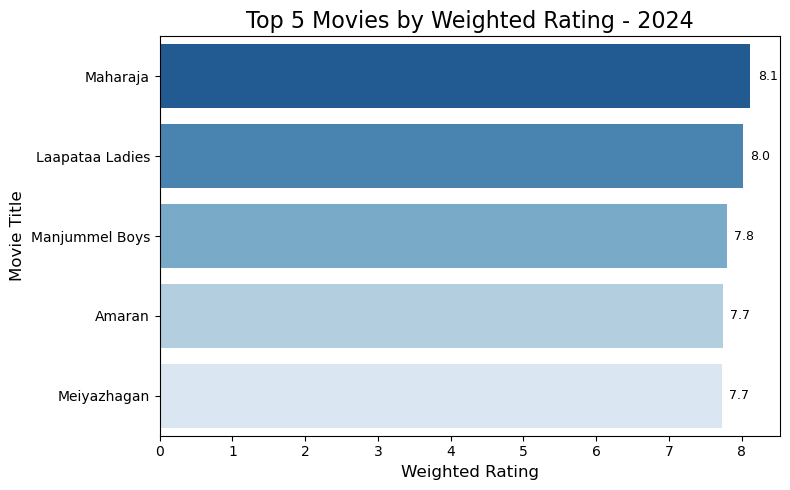

In [149]:
plt.figure(figsize=(8, 5))
sns.barplot(data=top_movies, x='Weighted_Rating', y='Title', palette='Blues_r')
for bar in bars:
    plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.1f}', va='center', fontsize=9)
plt.title('Top 5 Movies by Weighted Rating - 2024', fontsize=16)
plt.xlabel('Weighted Rating', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

By Observing the Bar Chart,
- Maharaja is the top-rated movie of 2024, with an impressive rating of 8.12, showing it's the most popular and highly appreciated film.
- Laapataa Ladies comes in second with a rating of 8.02, proving that comedy-drama films are also gaining strong attention from audiences.
- Movies like Manjummel Boys and Amaran, with ratings between 7.73 and 7.80, show that action and drama genres continue to resonate with viewers in 2024."

## Genre Frequency

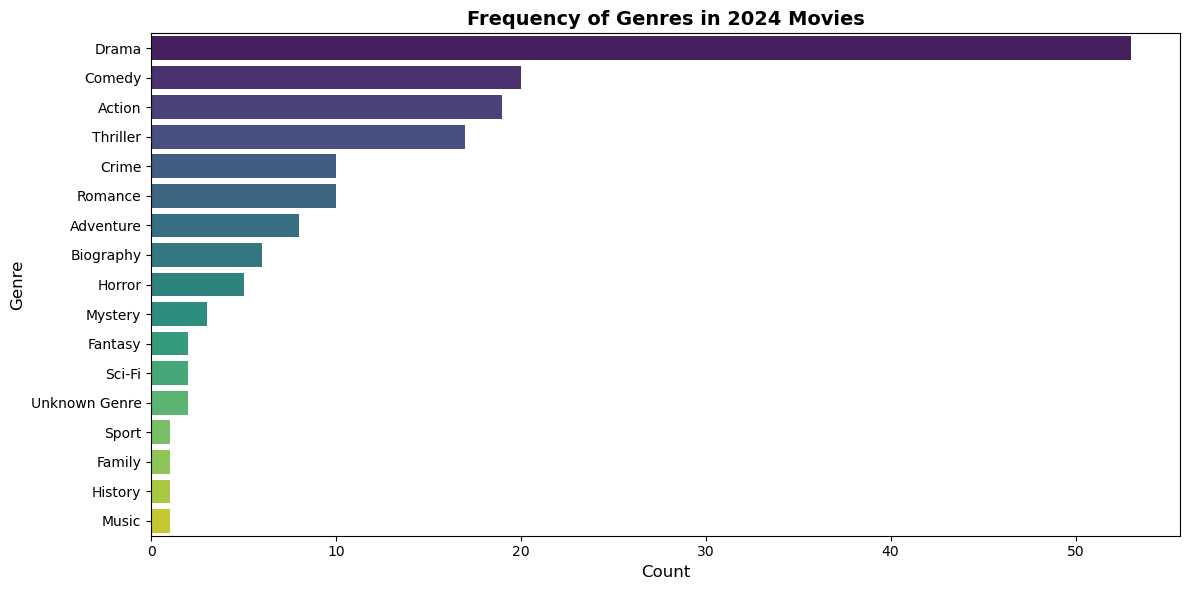

In [160]:
plt.figure(figsize=(12, 6))
genres_flat = pd.Series([genre for sublist in df['Genre'].str.split(', ') for genre in sublist])
sns.barplot(y=genres_flat.value_counts().index, x=genres_flat.value_counts().values, palette='viridis')
plt.title('Frequency of Genres in 2024 Movies', fontsize=14, weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

By Analysing: 
1. Genres like Adventure, Drama, Thriller and Drama, Family have the highest average ratings (7.73).
2. Movies with complex genres like Biography, Drama, History and Action, Crime, Drama are also highly rated.
3. Audiences seem to value movies that combine drama with either action or emotional depth

## Average Weighted Rating by Genre

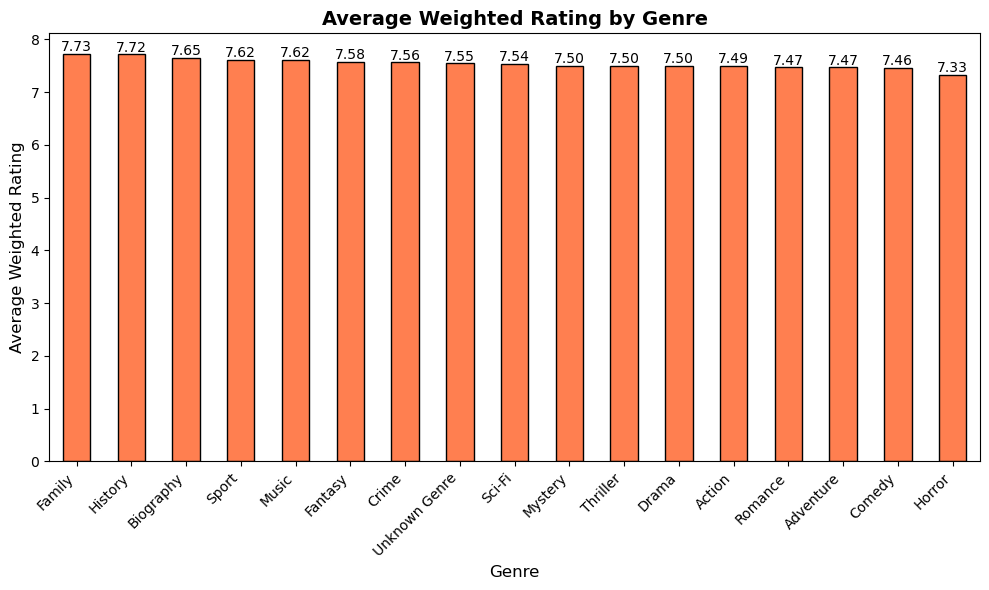

In [161]:
plt.figure(figsize=(10, 6))
genre_ratings.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Weighted Rating by Genre', fontsize=14, weight='bold')
plt.ylabel('Average Weighted Rating', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
for index, value in enumerate(genre_ratings):
    plt.text(index, value + 0.05, f"{value:.2f}", ha='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()


By Above chart:
1. Family and History genres have the highest average ratings (7.73 and 7.72).
2. Drama and Action genres perform well but are slightly behind in average ratings.
3. Horror has the lowest average (7.33), indicating a smaller preference for this genre in 2024.

## Top 10 Most Frequent Genre Combinations

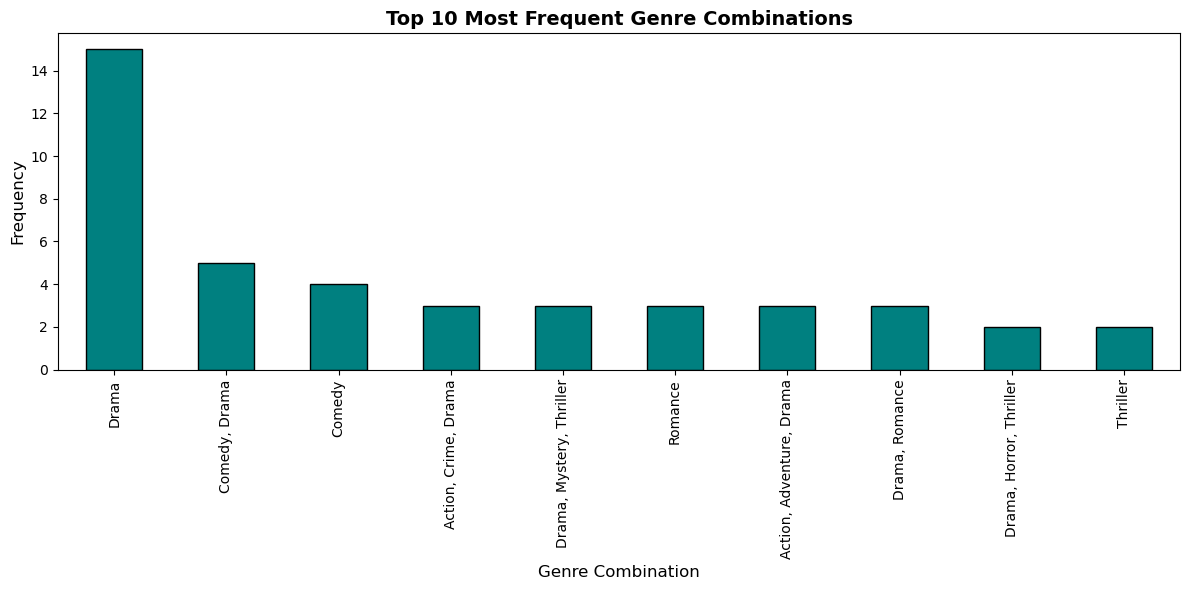

In [168]:
plt.figure(figsize=(12, 6))
genre_combinations.head(10).plot(kind='bar', color='teal', edgecolor='black')
plt.title('Top 10 Most Frequent Genre Combinations', fontsize=14, weight='bold')
plt.xlabel('Genre Combination', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

By above chart:
1. Drama is the most common genre combination, appearing in 14 movies.
2. Combinations like Comedy, Drama and Action, Crime, Drama are also popular, reflecting diverse audience tastes.
3. The variety of genres shows that movies with mixed themes attract broader attention.

## Top 3 Multi-Genre Movies

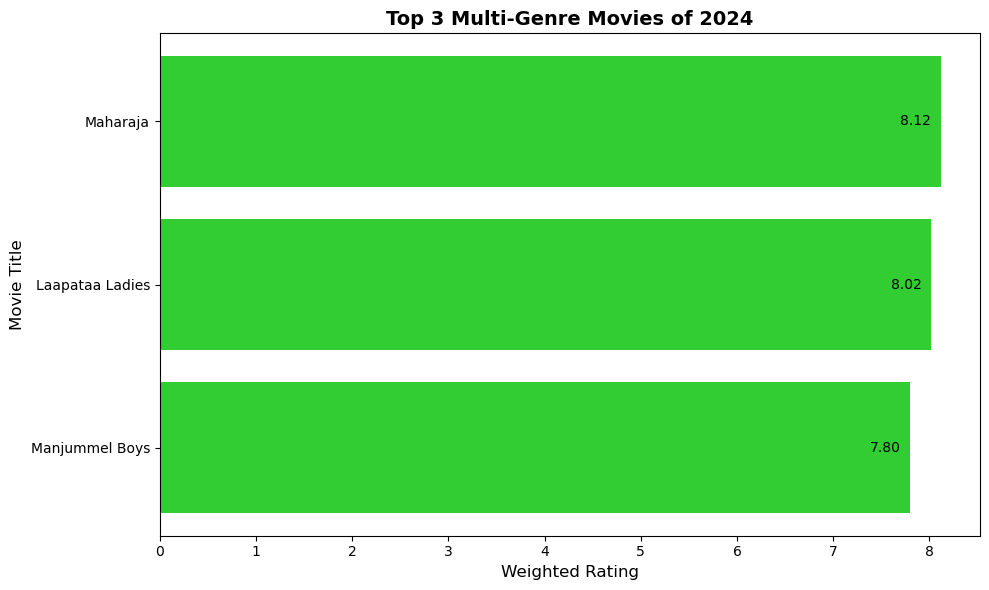

In [165]:
plt.figure(figsize=(10, 6))
plt.barh(multi_genre_movies_sorted['Title'], multi_genre_movies_sorted['Weighted_Rating'], color='limegreen')
plt.xlabel('Weighted Rating', fontsize=12)
plt.ylabel('Movie Title', fontsize=12)
plt.title('Top 3 Multi-Genre Movies of 2024', fontsize=14, weight='bold')
plt.gca().invert_yaxis()  # Invert to show highest at the top
for index, value in enumerate(multi_genre_movies_sorted['Weighted_Rating']):
    plt.text(value - 0.1, index, f"{value:.2f}", va='center', ha='right', fontsize=10, color='black')
plt.tight_layout()
plt.show()


By above observation:
1. Maharaja is rated the highest with 8.12, making it the top-rated multi-genre movie.
2. Laapataa Ladies is second with a close 8.02 rating.
3. Manjummel Boys ranks third with a slightly lower rating of 7.80.

## Top 10 genre combinations by average rating

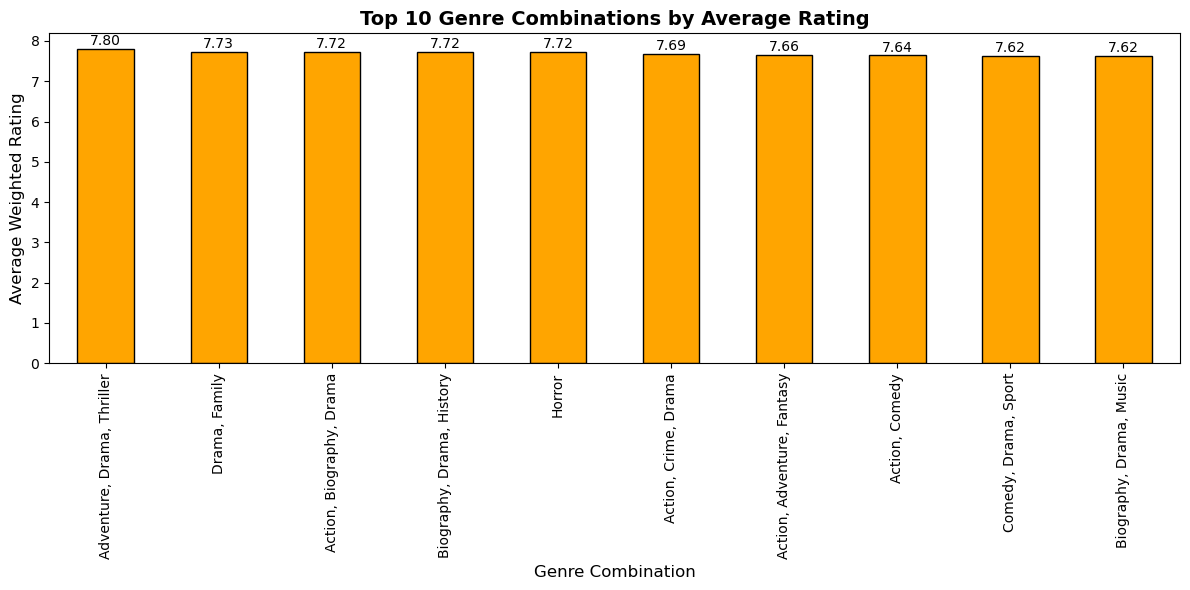

In [175]:
plt.figure(figsize=(12, 6))
top_combination_ratings = combination_ratings.head(10)
ax = top_combination_ratings.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Genre Combinations by Average Rating', fontsize=14, weight='bold')
plt.xlabel('Genre Combination', fontsize=12)
plt.ylabel('Average Weighted Rating', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
for index, value in enumerate(top_combination_ratings):
    plt.text(index, value + 0.02, f"{value:.2f}", ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


By the above observation:
1. Adventure, Drama, and Thriller has the highest average rating of 7.73.
2. Other high-rated combinations include Drama, Family (7.73) and Biography, Drama, History (7.72).
3. The genres Biography, Drama, Music and Comedy, Drama, Sport have the lowest ratings among the top 10 but are still strong at 7.62.

## Conclusion:
### *Our analysis shows that multi-genre movies like Maharaja and Laapataa Ladies are the highest-rated. Drama is the most popular and highly rated genre, often paired with thrillers or family themes. The combination Adventure, Drama, Thriller stands out with the best average rating. This project highlights how data helps us find the best movies and trends in cinema for 2024.*